In [114]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os 
import librosa
import librosa.display
import glob
import skimage

from scipy.io import wavfile

In [116]:
df = pd.read_csv('../input/notes.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,NameID,Lenght,ClassID
0,1A#.wav,0.903991,1
1,1A.wav,0.890998,1
2,1B.wav,1.180998,2
3,1C#.wav,1.055011,3
4,1C.wav,1.053991,3


In [117]:
d1, samp1 = librosa.load('../input/1B.wav')
d2, samp2 = librosa.load('../input/1C.wav')

Text(0.5, 1.0, 'Linear spectrogramm')

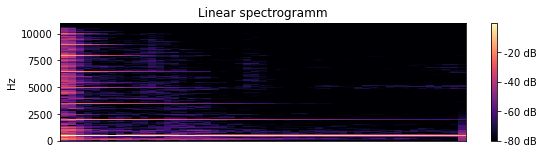

In [118]:
plt.figure(figsize=(20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(d1)), ref=np.max)
plt.subplot(4,2,1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear spectrogramm')

Text(0.5, 1.0, 'Linear spectrogramm')

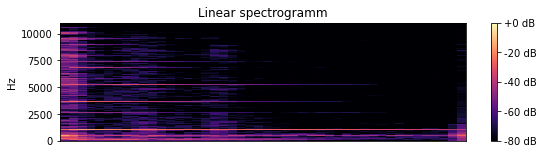

In [119]:
plt.figure(figsize=(20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(d2)), ref=np.max)
plt.subplot(4,2,1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear spectrogramm')

In [120]:
d1, samp1 = librosa.load('../input/1D#.wav')
arr = librosa.feature.melspectrogram(y=d1, sr=samp1)
arr.shape

(128, 42)

In [121]:
feature = []
label = []

In [122]:
def parser(row):
    for i, name in enumerate(df['NameID']):
        filename = f'../input/{name}'
        X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        feature.append(mels)
        label.append(df['ClassID'][i])
    return [feature, label]
        
        

In [123]:
temp = parser(df)

In [124]:
temp

[[array([2.83252884e-04, 4.00242337e-04, 1.91656556e-02, 1.49868846e-01,
         3.48647274e-02, 1.70660466e-02, 1.05388775e-01, 5.39516918e-02,
         2.34719235e-02, 1.91949476e-02, 9.43095610e-03, 8.24432354e-03,
         6.85885223e-03, 1.55880768e-02, 3.52469608e-02, 2.29627103e-01,
         4.30188847e+00, 4.96287231e+01, 9.55842018e+00, 5.27928919e-02,
         2.40746327e-02, 7.04727648e-03, 9.27205954e-04, 3.20433901e-04,
         1.46727849e-04, 3.18382023e-04, 1.36296952e-03, 2.15866859e-03,
         2.78353202e-03, 2.41252244e-03, 1.12009794e-03, 6.85176346e-04,
         1.01294031e-03, 4.36011655e-03, 2.16693193e-01, 3.77114820e+00,
         1.36410618e+00, 1.18463496e-02, 3.58425849e-03, 6.82149269e-03,
         1.81378238e-03, 1.43261408e-04, 5.84846530e-05, 1.21515281e-04,
         3.78892961e-04, 3.91023030e-04, 4.60265437e-04, 1.92653941e-04,
         4.15282957e-05, 4.59948169e-05, 1.96885271e-03, 1.66396110e-03,
         3.73109651e-05, 2.55793566e-05, 2.94392266

In [125]:
temp = np.array(temp)

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_5340/664304316.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(temp)


In [126]:
data = temp.transpose()

In [157]:
X_ = data[:,0]
Y = data[:,1]
print(X_.shape, Y.shape)

(153,) (153,)


In [158]:
Y

array([1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 1, 1, 2, 2, 3, 3, 4, 4, 5,
       6, 6, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 1, 2, 2, 3, 3, 4, 4, 5,
       6, 6, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 7, 1, 1, 2, 3, 3,
       4, 4, 5, 6, 6, 7, 7, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 1, 1,
       2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 6,
       6, 7, 7, 7, 1, 1, 2, 3, 3, 4, 4, 4, 5, 6, 6, 7, 7, 1, 1, 1, 2, 3,
       3, 4, 4, 5, 6, 6, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
      dtype=object)

In [159]:
X = np.empty([153, 128])

In [160]:
for i in range(78):
    X[i] = (X_[i])

In [161]:
Y

array([1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 1, 1, 2, 2, 3, 3, 4, 4, 5,
       6, 6, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 1, 2, 2, 3, 3, 4, 4, 5,
       6, 6, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 7, 1, 1, 2, 3, 3,
       4, 4, 5, 6, 6, 7, 7, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 1, 1,
       2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 6,
       6, 7, 7, 7, 1, 1, 2, 3, 3, 4, 4, 4, 5, 6, 6, 7, 7, 1, 1, 1, 2, 3,
       3, 4, 4, 5, 6, 6, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
      dtype=object)

In [162]:
Y = to_categorical(Y)

In [163]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [164]:
print(f'Shapes:\nX: {X.shape}\nY: {Y.shape}')

Shapes:
X: (153, 128)
Y: (153, 8)


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [226]:
X_train = X_train.reshape(114, 16, 8, 1)
X_test = X_test.reshape(153-114, 16, 8, 1)

In [227]:
input_dim = (16,8,1)

In [228]:
model = Sequential()

In [229]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=input_dim))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [230]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [231]:
model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/200
12/12 [==============================] - 1s 30ms/step - loss: 2.7835 - accuracy: 0.1609 - val_loss: 2.3055 - val_accuracy: 0.2051
Epoch 2/200
12/12 [==============================] - 0s 17ms/step - loss: 1.8579 - accuracy: 0.3021 - val_loss: 2.2430 - val_accuracy: 0.1282
Epoch 3/200
12/12 [==============================] - 0s 17ms/step - loss: 1.5504 - accuracy: 0.4113 - val_loss: 2.5066 - val_accuracy: 0.1538
Epoch 4/200
12/12 [==============================] - 0s 17ms/step - loss: 1.5092 - accuracy: 0.4197 - val_loss: 2.7130 - val_accuracy: 0.1795
Epoch 5/200
12/12 [==============================] - 0s 17ms/step - loss: 1.2438 - accuracy: 0.4628 - val_loss: 2.6396 - val_accuracy: 0.2821
Epoch 6/200
12/12 [==============================] - 0s 18ms/step - loss: 1.3102 - accuracy: 0.4891 - val_loss: 2.5940 - val_accuracy: 0.1795
Epoch 7/200
12/12 [==============================] - 0s 19ms/step - loss: 1.3179 - accuracy: 0.4567 - val_loss: 2.3622 - val_accuracy: 0.1538
Epoch 

In [232]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 2, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 2, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)             

In [233]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)

2/2 [==============================] - 0s 3ms/step - loss: 9.3296 - accuracy: 0.2308
[9.329596519470215, 0.23076923191547394]


In [95]:
preds = np.argmax(predictions, axis=1)

In [97]:
result = pd.DataFrame(preds)
result.to_csv('DWS_middle_results.csv')